In [2]:
import pandas as pd

# Loading Data

In [3]:
data = pd.read_csv('../Data/Frog_Orccurence_Merged.csv') #read data
df = data.drop(['Unnamed: 0','swe','crs','coord','min_lon','max_lon','min_lat','max_lat','ppt_station_influence','tmax_station_influence','tmin_station_influence','vap_station_influence','samples_count'], axis=1)
df.dropna(inplace=True) #drop na
data = df 
data['frog_c'] = data['frog_count'] #moving frog count at the last column
del data['frog_count'] #delete frog_count

# Plotting Target Variable

<AxesSubplot:>

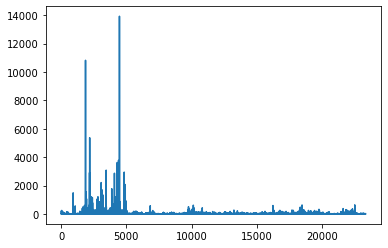

In [7]:
plotdata = data
plotdata['frog_c'].plot(kind="line")


# Creating the Regression Model

In [9]:
y= data['frog_c']
x = data.drop(['frog_c'], axis=1)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x.values,y.values, test_size=0.25, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(x_train, y_train)

from sklearn.metrics import accuracy_score 
predicted = reg.predict(x_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.289


/home/pedertanberg/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
